In [36]:
import numpy as np
import matplotlib.pyplot as plt
# custom package
import plotting_tools as pt
%matplotlib inline

import itertools

from matplotlib.patches import Ellipse
from scipy.stats import norm
from scipy import stats

# this is a module I created
from cluster_methods import *

from sklearn import decomposition
import skfuzzy as fuzz
from sklearn import preprocessing
from sklearn import manifold

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

import kcorrect

from scipy import linalg

import cluster_methods
from sklearn.mixture import GMM

def kernel_density_estimation(x,y):
    xmin = np.min(x)
    xmax = np.max(x)
    ymin = np.min(y)
    ymax = np.max(y)
    # Peform the kernel density estimate
    xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    return xx,yy,f

In [5]:
data = np.load('/home/calum/Documents/Mphys_data/vespa_data/mdata.npy')
data_scaled = np.load('/home/calum/Documents/Mphys_data/vespa_data/scaledmdata.npy')
M_galaxies = np.load('/home/calum/Documents/Mphys_data/vespa_data/Mgalaxies.npy')

/home/calum/anaconda3/lib/python3.5/site-packages/matplotlib/transforms.py:1965: ComplexWarning: Casting complex values to real discards the imaginary part
  np.float_)


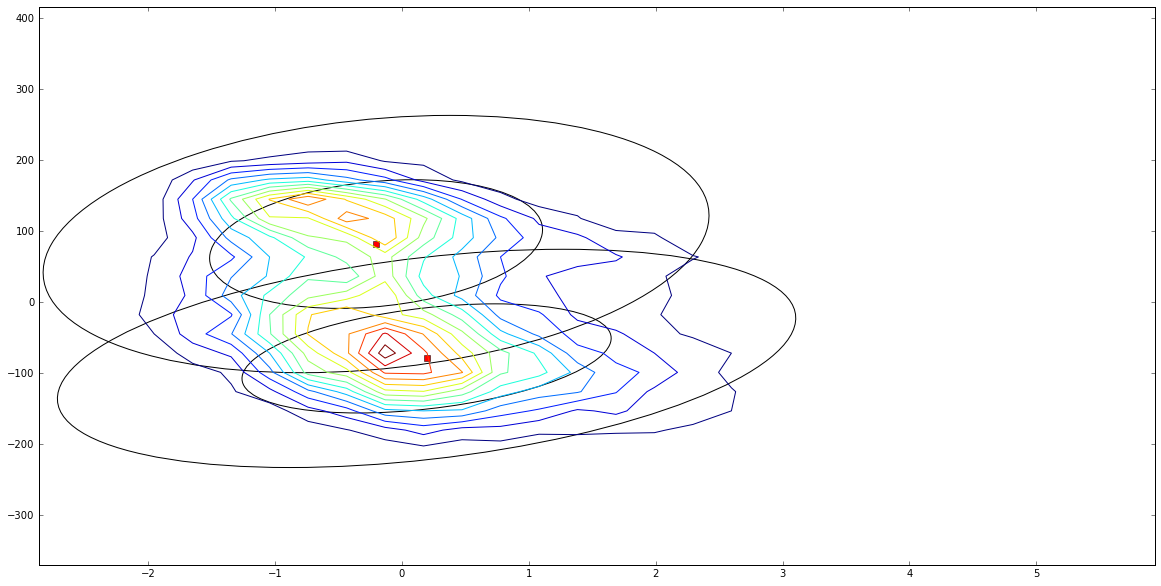

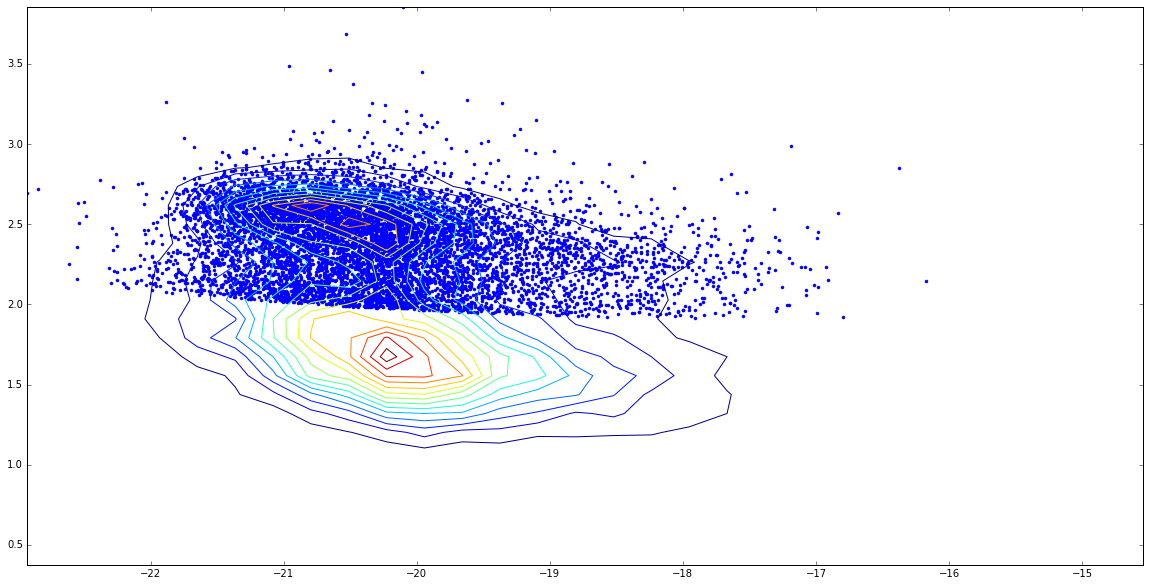

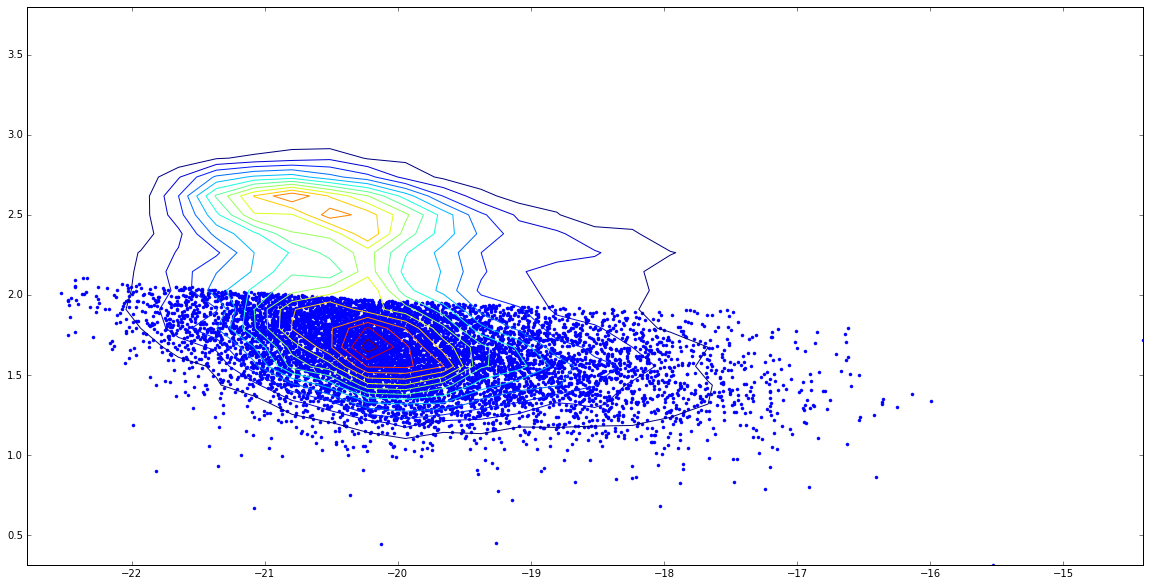

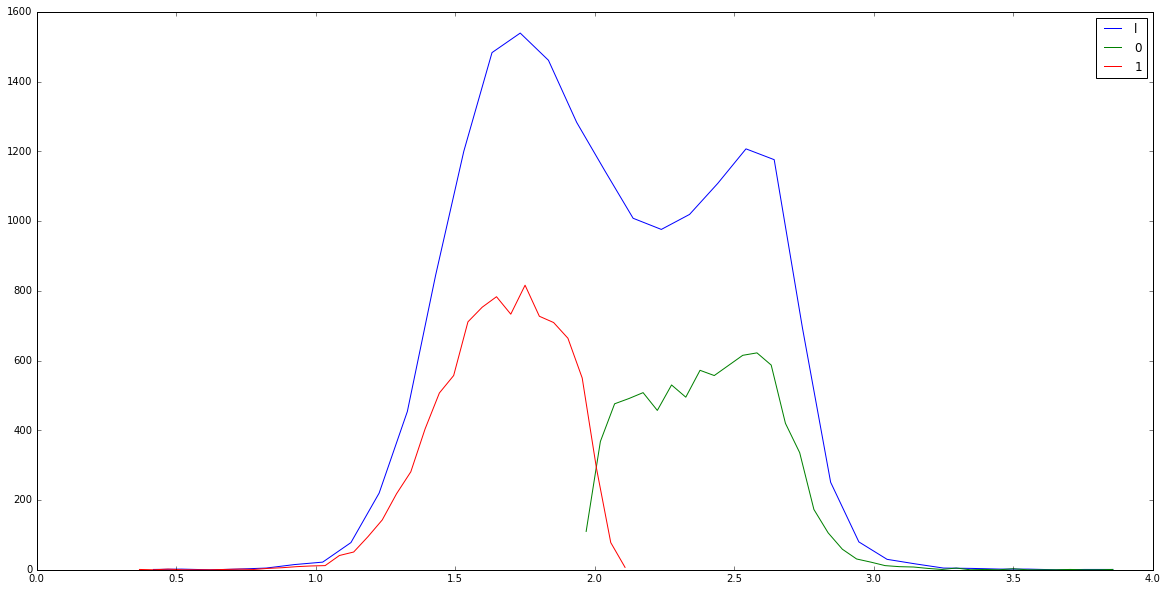

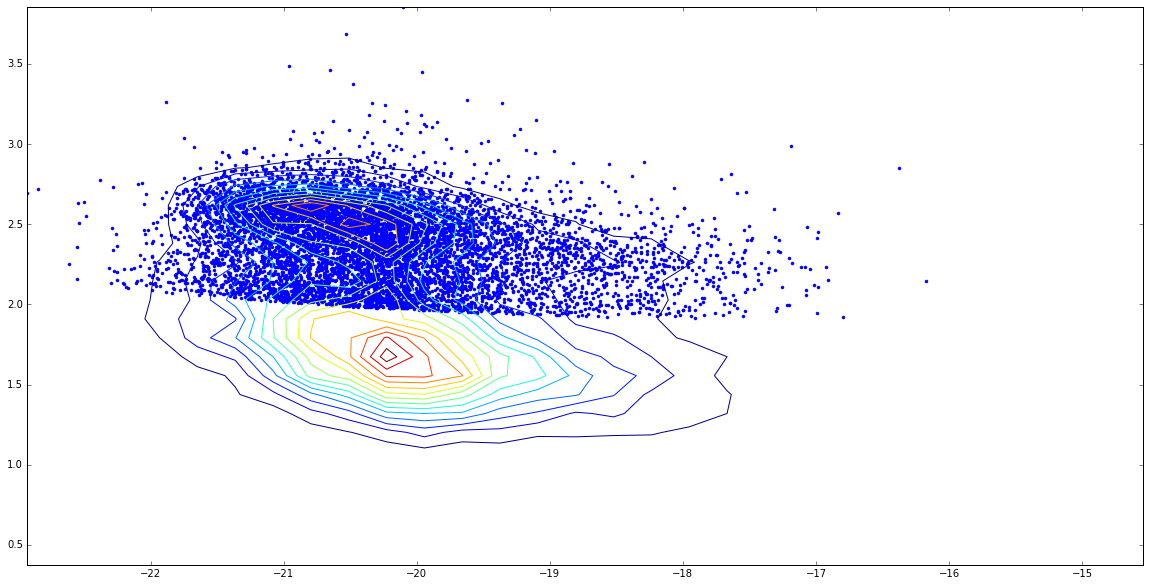

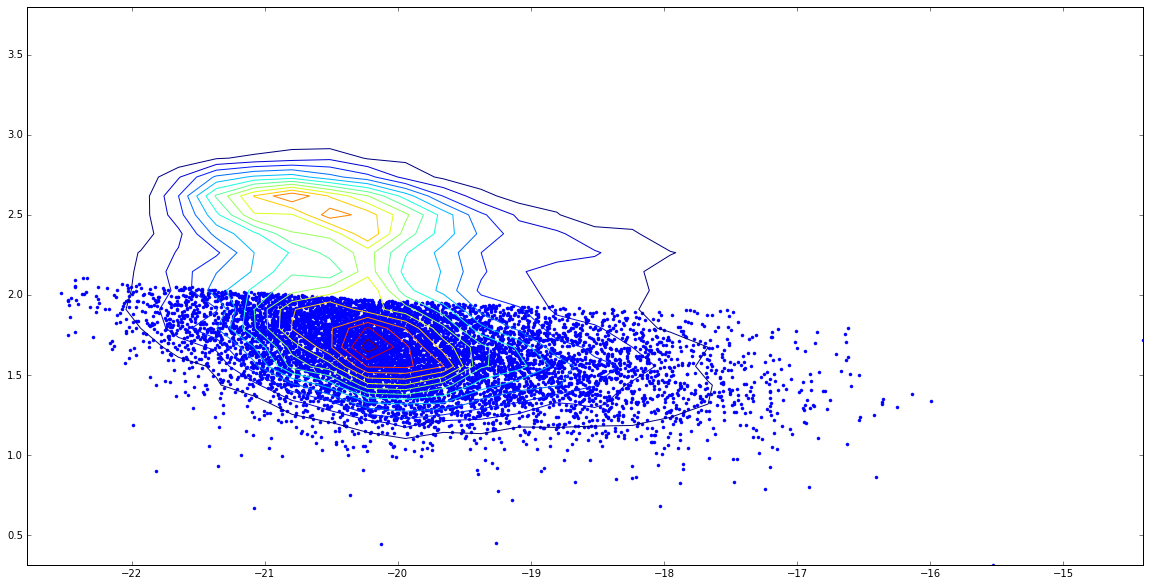

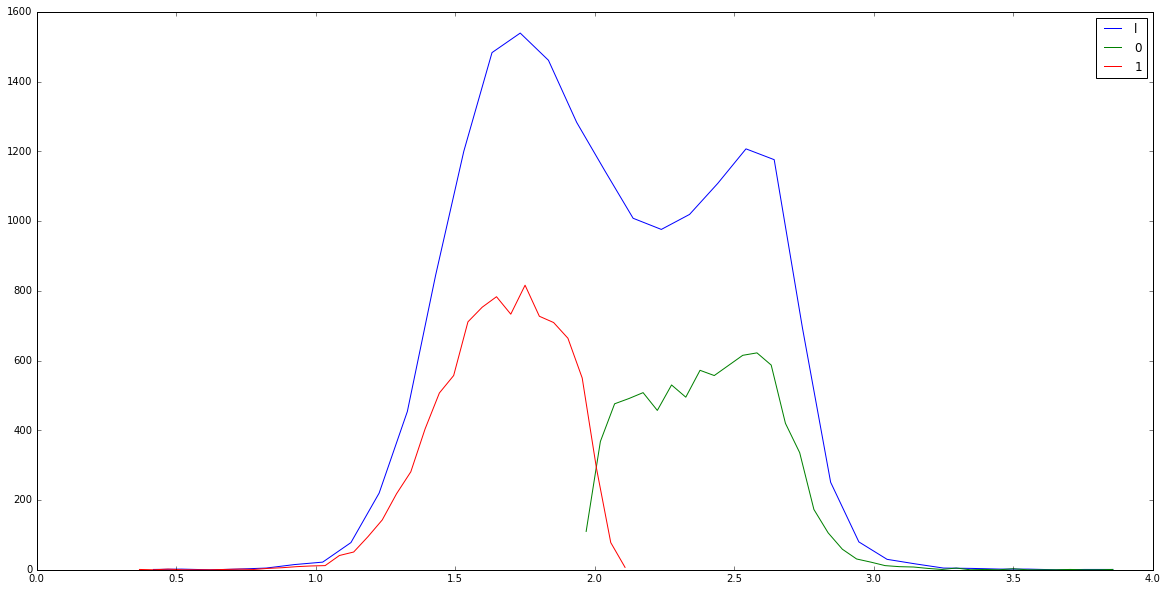

In [3]:
cluster_probs, gmm = cluster_methods.gmm_clustering(data,[[row[0],100*row[1]] for row in data_scaled],2,500,'mc','full')

In [6]:
def plot_hist(array,bin_num,label,normed=True,set_bin_size=False,bin_size=1,colour='b',alt='norm'):
    """Histogram plotter made by me, versatile"""
    if set_bin_size == True:
        bin_num = float(np.max(array)-np.min(array))/bin_size
        n, bins = np.histogram(array,bins=int(bin_num),normed=normed)
    else:
        n, bins = np.histogram(array,bins=bin_num,normed=normed)
    if alt == 'bluey':
        plt.plot(bins[1:],n,'--',linewidth=3,color=colour)
    else:
        plt.plot(bins[1:],n,label=label,drawstyle='steps-mid',linewidth=3,color=colour)
    return 

In [23]:
rlim_Mgalaxies = [row for row in M_galaxies if 0.08>row[0]>0.004]
reduced_rlim_Mgalaxies = [row for row in rlim_Mgalaxies if False == np.isnan(row[5]) and row[3]-row[5]<4]

In [24]:
#reduced_rlim_Mgalaxies = [row for row in rlim_Mgalaxies if row[2]>-999 and row[3]>-999 and row[4]>-999 and row[5]>-999 and 
#                                                row[6]>-999 and row[7]>-999 and row[8]>-999 and row[9]>-999 and 
#                                                row[10]>-999 and row[11]>-999 and row[12]>-999 and row[13]>-999]

In [25]:
cluster_membership = np.argmax(cluster_probs.T, axis=0)

In [31]:
blue_Mgalaxies = []
for i,row in enumerate(cluster_membership):
    if cluster_membership[i] == 1:
        blue_Mgalaxies.append(reduced_rlim_Mgalaxies[i])
red_Mgalaxies = []
for i,row in enumerate(cluster_membership):
    if cluster_membership[i] == 0:
        red_Mgalaxies.append(reduced_rlim_Mgalaxies[i])

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.]),
 <a list of 8 Text yticklabel objects>)

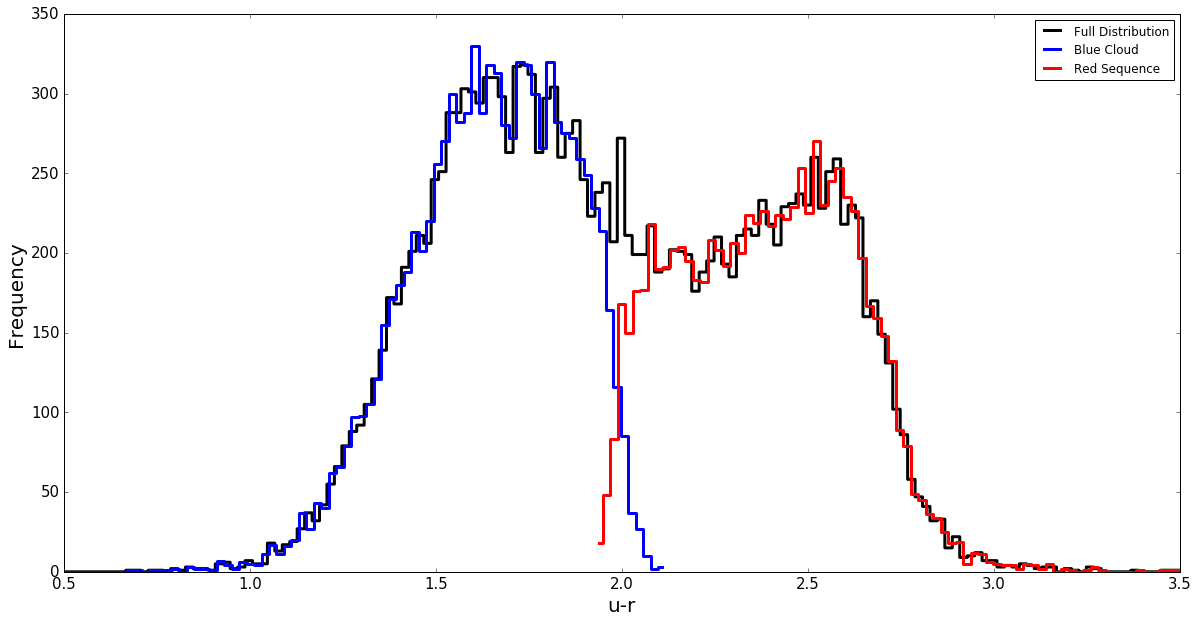

In [69]:
plt.figure(figsize=(20,10))
plot_hist([row[3]-row[5] for row in rlim_Mgalaxies],200,'Full Distribution',set_bin_size=True,bin_size=0.02,normed=False,colour='k')
#plot_hist(y[clusters_zero == 1],200,'Green Valley',set_bin_size=True,bin_size=0.02,normed=False,colour='g')

#for i in range(2):
#    pt.plot_hist(y[cluster_membership==i],200,str(i),set_bin_size=True,bin_size=0.05,normed=False)

plot_hist([row[3]-row[5] for row in blue_Mgalaxies],200,'Blue Cloud',set_bin_size=True,bin_size=0.02,normed=False,colour='b')
plot_hist([row[3]-row[5] for row in red_Mgalaxies],200,'Red Sequence',set_bin_size=True,bin_size=0.02,normed=False,colour='r')


plt.xlim(0.5,3.5)
plt.xlabel('u-r',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [28]:
len(cluster_membership),len(rlim_Mgalaxies)

(17334, 17414)

In [33]:
# begin creating colour-magnitude diagrams
# the different colours
#          1     2    3   4   5   6   7   8   9   10  11  12   13
names = ['FUV','NUV','u','g','r','i','z','Y','J','H','K','W1','W2']
indices = [i for i in range(2,14)]   
colour_combos = [i for i in itertools.combinations(indices,2)]
len(colour_combos), len(names), len(indices)

(66, 13, 12)

In [34]:
# make blue galaxies all with photometry, ignore FUV
reducedblue = [row for row in blue_Mgalaxies if row[2]>-999 and row[3]>-999 and row[4]>-999 and row[5]>-999 and 
                                                row[6]>-999 and row[7]>-999 and row[8]>-999 and row[9]>-999 and 
                                                row[10]>-999 and row[11]>-999 and row[12]>-999 and row[13]>-999]

test_data = [row for row in reduced_rlim_Mgalaxies if row[2]>-999 and row[3]>-999 and row[4]>-999 and row[5]>-999 and 
                                                row[6]>-999 and row[7]>-999 and row[8]>-999 and row[9]>-999 and 
                                                row[10]>-999 and row[11]>-999 and row[12]>-999 and row[13]>-999]

In [37]:
for colrow in colour_combos:
    print(names[colrow[0]-1]+'-'+names[colrow[1]-1])
    x = [row[colrow[1]] for row in test_data]
    y = [row[colrow[0]]-row[colrow[1]] for row in test_data]  
    xx,yy,f = kernel_density_estimation(x,y)
    
    first_len = len(x)
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca()
    # Contourf plot
    cfset = ax.contourf(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
    ## Or kernel density estimate plot instead of the contourf plot
    #ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
    
    x = [row[colrow[1]] for row in reducedblue]
    y = [row[colrow[0]]-row[colrow[1]] for row in reducedblue]  
    xx,yy,f = kernel_density_estimation(x,y)
    
    cset = ax.contour(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], colors='k',alpha=1.)
    # Label plot
    ax.clabel(cset, inline=1, fontsize=10)
    label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
    ax.set_ylabel(label,fontsize=20)
    ax.set_xlabel(names[colrow[1]-1],fontsize =20)
    title_string = str(len(x))+str(first_len)
    ax.set_title(title_string)
    #ax.set_ylim(0,7.5)
    #ax.set_xlim(-23,-17)
    savestring = '/home/calum/Documents/Mphys_data/images/naive'+label
    plt.savefig(savestring)
    plt.close()

NUV-u
NUV-g
NUV-r
NUV-i
NUV-z
NUV-Y
NUV-J
NUV-H
NUV-K
NUV-W1
NUV-W2
u-g
u-r
u-i
u-z
u-Y


/home/calum/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


u-J
u-H
u-K
u-W1
u-W2
g-r
g-i
g-z
g-Y
g-J
g-H
g-K
g-W1
g-W2
r-i
r-z
r-Y
r-J
r-H
r-K
r-W1
r-W2
i-z
i-Y
i-J
i-H
i-K
i-W1
i-W2
z-Y
z-J
z-H
z-K
z-W1
z-W2
Y-J
Y-H
Y-K
Y-W1
Y-W2
J-H
J-K
J-W1
J-W2
H-K
H-W1
H-W2
K-W1
K-W2
W1-W2


In [ ]:
#####################################################################

In [38]:
colrow = [2,5]
tNUVrx = [row[colrow[1]] for row in test_data]
tNUVry = [row[colrow[0]]-row[colrow[1]] for row in test_data]  
tNUVrxx,tNUVryy,tNUVrf = kernel_density_estimation(tNUVrx,tNUVry)

NUVrx = [row[colrow[1]] for row in reducedblue]
NUVry = [row[colrow[0]]-row[colrow[1]] for row in reducedblue]  
NUVrxx,NUVryy,NUVrf = kernel_density_estimation(NUVrx,NUVry)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 7 Text yticklabel objects>)

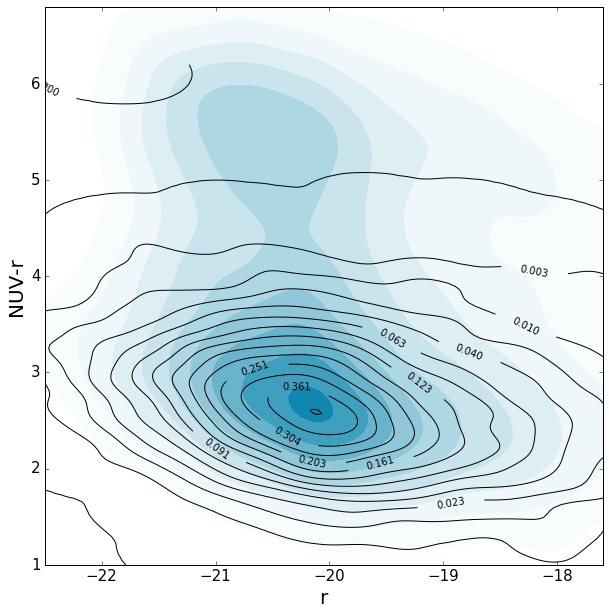

In [57]:
colrow = [2,5]


xx,yy,f = tNUVrxx,tNUVryy,tNUVrf

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

xx,yy,f = NUVrxx,NUVryy,NUVrf

cset = ax.contour(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel(names[colrow[1]-1],fontsize =20)
ax.set_ylim(1,6.8)
ax.set_xlim(-22.5,-17.6)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [40]:
colrow = [2,8]
tNUVYx = [row[colrow[1]] for row in test_data]
tNUVYy = [row[colrow[0]]-row[colrow[1]] for row in test_data]  
tNUVYxx,tNUVYyy,tNUVYf = kernel_density_estimation(tNUVYx,tNUVYy)

NUVYx = [row[colrow[1]] for row in reducedblue]
NUVYy = [row[colrow[0]]-row[colrow[1]] for row in reducedblue]  
NUVYxx,NUVYyy,NUVYf = kernel_density_estimation(NUVYx,NUVYy)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 8 Text yticklabel objects>)

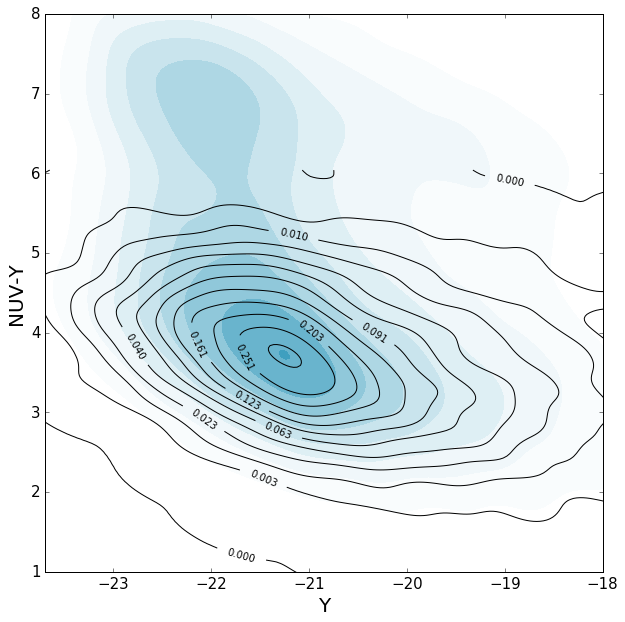

In [58]:
colrow = [2,8]


xx,yy,f = tNUVYxx,tNUVYyy,tNUVYf

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

xx,yy,f = NUVYxx,NUVYyy,NUVYf

cset = ax.contour(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel(names[colrow[1]-1],fontsize =20)
ax.set_ylim(1,8)
ax.set_xlim(-23.7,-18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [43]:
colrow = [2,12]
tNUVW1x = [row[colrow[1]] for row in test_data]
tNUVW1y = [row[colrow[0]]-row[colrow[1]] for row in test_data]  
tNUVW1xx,tNUVW1yy,tNUVW1f = kernel_density_estimation(tNUVW1x,tNUVW1y)

NUVW1x = [row[colrow[1]] for row in reducedblue]
NUVW1y = [row[colrow[0]]-row[colrow[1]] for row in reducedblue]  
NUVW1xx,NUVW1yy,NUVW1f = kernel_density_estimation(NUVW1x,NUVW1y)

(array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 9 Text yticklabel objects>)

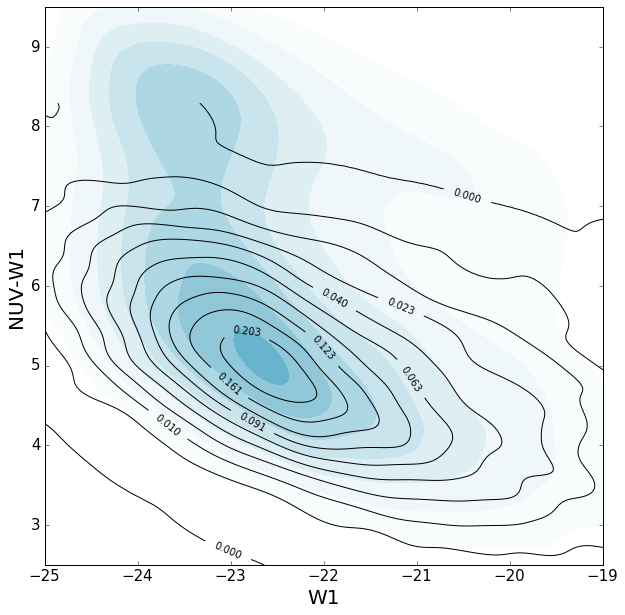

In [59]:
colrow = [2,12]

xx,yy,f = tNUVW1xx,tNUVW1yy,tNUVW1f

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

xx,yy,f = NUVW1xx,NUVW1yy,NUVW1f

cset = ax.contour(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel(names[colrow[1]-1],fontsize =20)
ax.set_ylim(2.5,9.5)
ax.set_xlim(-25,-19)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [66]:
colrow = [5,9]
trJx = [row[colrow[1]] for row in test_data]
trJy = [row[colrow[0]]-row[colrow[1]] for row in test_data]  
trJxx,trJyy,trJf = kernel_density_estimation(trJx,trJy)

rJx = [row[colrow[1]] for row in reducedblue]
rJy = [row[colrow[0]]-row[colrow[1]] for row in reducedblue]  
rJxx,rJyy,rJf = kernel_density_estimation(rJx,rJy)

(array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 6 Text yticklabel objects>)

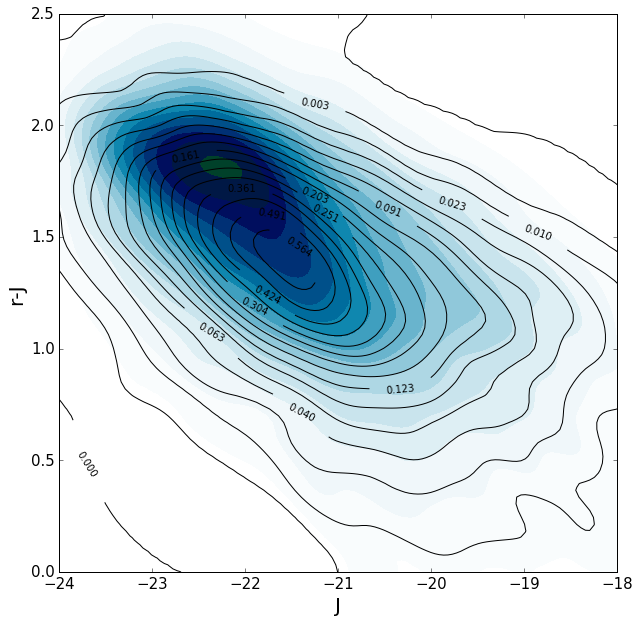

In [67]:
colrow = [5,9]

xx,yy,f = trJxx,trJyy,trJf 

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

xx,yy,f = rJxx,rJyy,rJf 

cset = ax.contour(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel(names[colrow[1]-1],fontsize =20)
ax.set_ylim(0,2.5)
ax.set_xlim(-24,-18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [46]:
colrow = [3,8]
tuYx = [row[colrow[1]] for row in test_data]
tuYy = [row[colrow[0]]-row[colrow[1]] for row in test_data]  
tuYxx,tuYyy,tuYf = kernel_density_estimation(tuYx,tuYy)

uYx = [row[colrow[1]] for row in reducedblue]
uYy = [row[colrow[0]]-row[colrow[1]] for row in reducedblue]  
uYxx,uYyy,uYf = kernel_density_estimation(uYx,uYy)

(array([ 1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 7 Text yticklabel objects>)

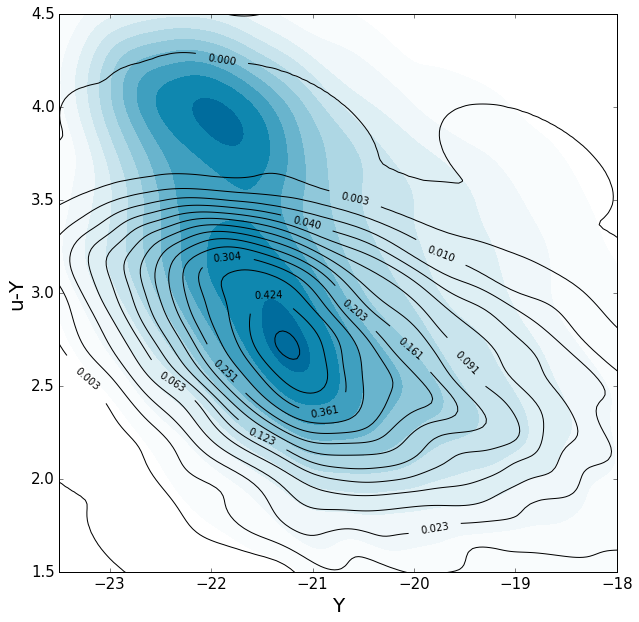

In [62]:
colrow = [3,8]

xx,yy,f = tuYxx,tuYyy,tuYf 

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

xx,yy,f = uYxx,uYyy,uYf 

cset = ax.contour(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel(names[colrow[1]-1],fontsize =20)
ax.set_ylim(1.5,4.5)
ax.set_xlim(-23.5,-18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [47]:
colrow = [3,5]
turx = [row[colrow[1]] for row in test_data]
tury = [row[colrow[0]]-row[colrow[1]] for row in test_data]  
turxx,turyy,turf = kernel_density_estimation(turx,tury)

urx = [row[colrow[1]] for row in reducedblue]
ury = [row[colrow[0]]-row[colrow[1]] for row in reducedblue]  
urxx,uryy,urf = kernel_density_estimation(urx,ury)

(array([ 1. ,  1.5,  2. ,  2.5,  3. ]), <a list of 5 Text yticklabel objects>)

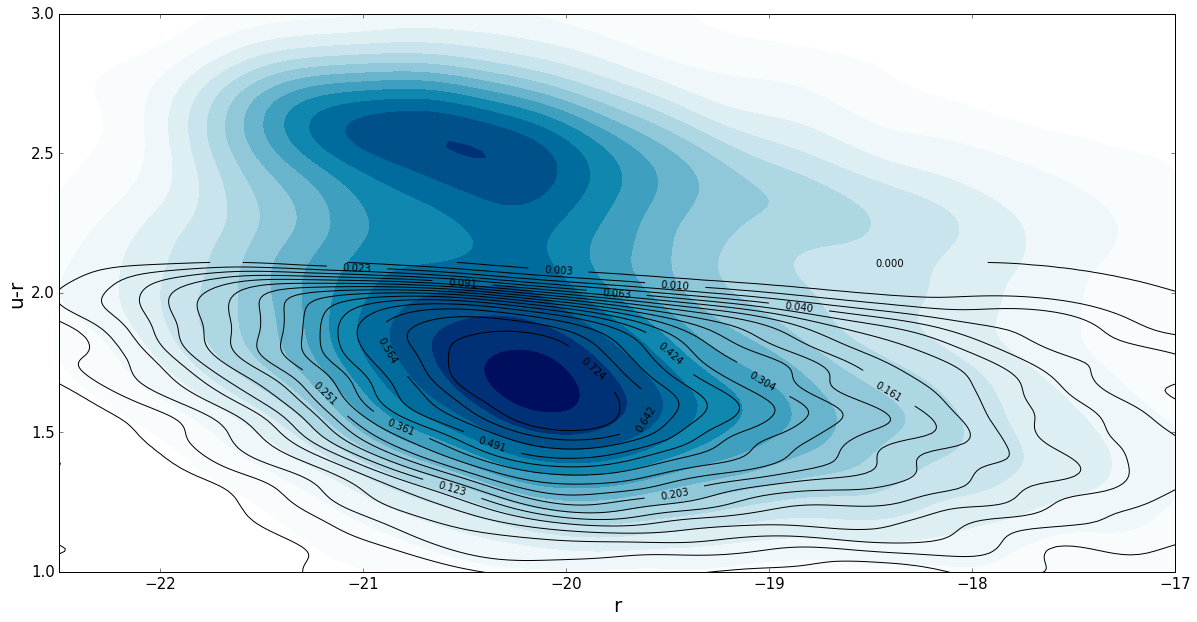

In [68]:
colrow = [3,5]

xx,yy,f = turxx,turyy,turf

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

xx,yy,f = urxx,uryy,urf 

cset = ax.contour(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel(names[colrow[1]-1],fontsize =20)
ax.set_ylim(1,3)
ax.set_xlim(-22.5,-17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [48]:
colrow = [8,13]
tYW2x = [row[colrow[1]] for row in test_data]
tYW2y = [row[colrow[0]]-row[colrow[1]] for row in test_data]  
tYW2xx,tYW2yy,tYW2f = kernel_density_estimation(tYW2x,tYW2y)

YW2x = [row[colrow[1]] for row in reducedblue]
YW2y = [row[colrow[0]]-row[colrow[1]] for row in reducedblue]  
YW2xx,YW2yy,YW2f = kernel_density_estimation(YW2x,YW2y)

(array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <a list of 6 Text yticklabel objects>)

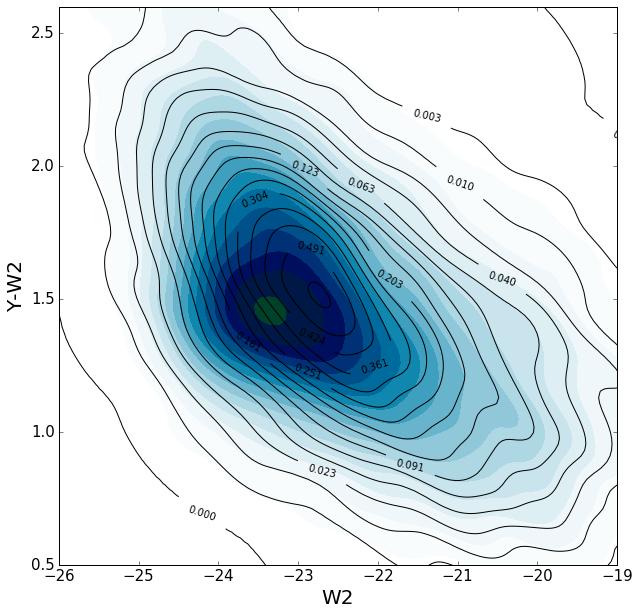

In [64]:
colrow = [8,13]

xx,yy,f = tYW2xx,tYW2yy,tYW2f

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

xx,yy,f = YW2xx,YW2yy,YW2f

cset = ax.contour(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel(names[colrow[1]-1],fontsize =20)
ax.set_ylim(0.5,2.6)
ax.set_xlim(-26,-19)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [82]:
colrow = [11,13]
tzW1x = [row[colrow[1]] for row in test_data]
tzW1y = [row[colrow[0]]-row[colrow[1]] for row in test_data]  
tzW1xx,tYW1yy,tYW1f = kernel_density_estimation(tzW1x,tzW1y)

zW1x = [row[colrow[1]] for row in reducedblue]
zW1y = [row[colrow[0]]-row[colrow[1]] for row in reducedblue]  
zW1xx,zW1yy,zW1f = kernel_density_estimation(zW1x,zW1y)

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 10 Text yticklabel objects>)

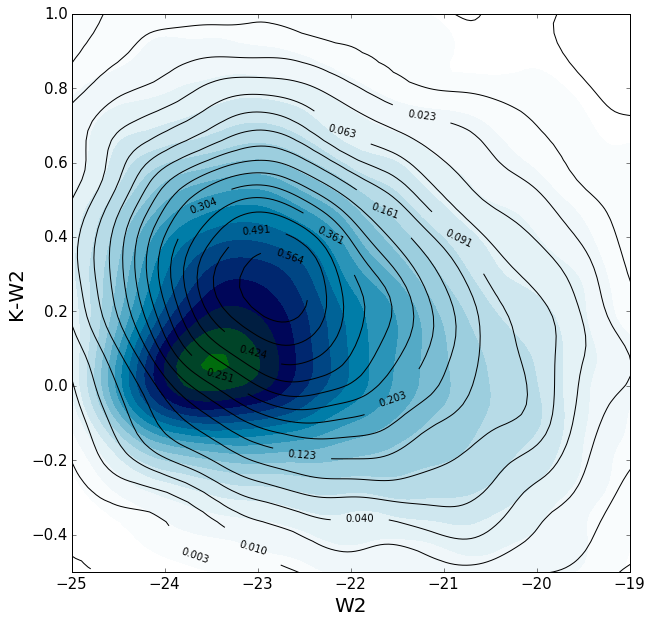

In [86]:
colrow = [11,13]

xx,yy,f = tzW1xx,tYW1yy,tYW1f

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.95,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

xx,yy,f = zW1xx,zW1yy,zW1f

cset = ax.contour(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.95,0.05)], colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel(names[colrow[1]-1],fontsize =20)
ax.set_ylim(-0.5,1)
ax.set_xlim(-25,-19)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

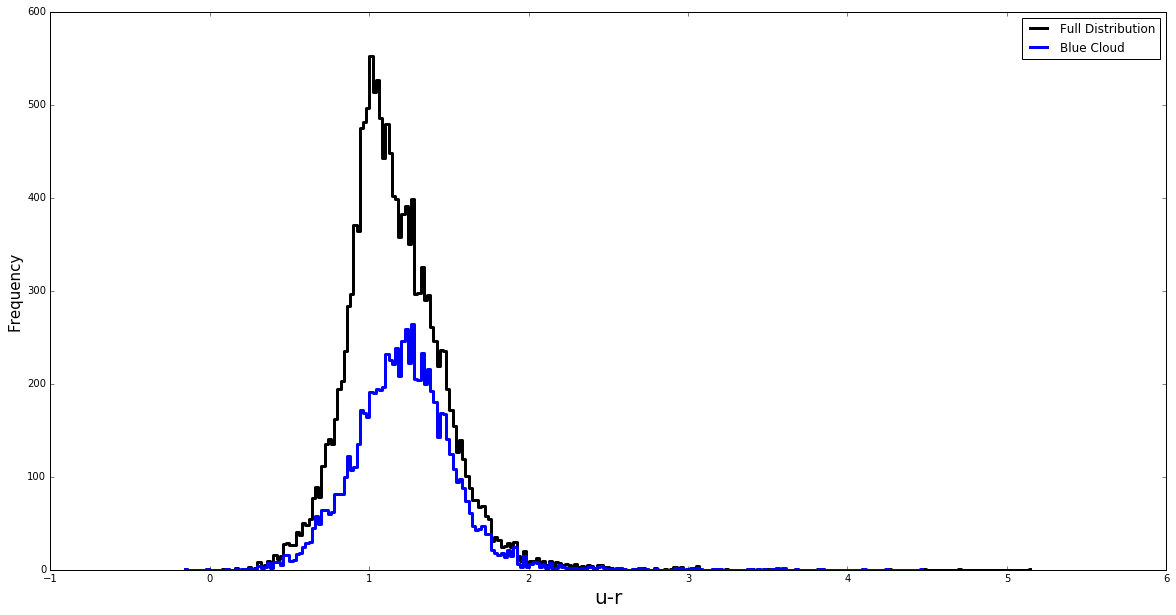

In [77]:
colrow = [9,13]


plt.figure(figsize=(20,10))
plot_hist([row[colrow[0]]-row[colrow[1]] for row in test_data],200,'Full Distribution',set_bin_size=True,bin_size=0.02,normed=False,colour='k')
#plot_hist([row[3]-row[5] for row in reduced_data],200,'Full Distribution',set_bin_size=True,bin_size=0.02,normed=False,colour='k')
plot_hist([row[colrow[0]]-row[colrow[1]] for row in reducedblue],200,'Blue Cloud',set_bin_size=True,bin_size=0.02,normed=False,colour='b')


#plt.xlim(0.5,3.5)
plt.xlabel('u-r',fontsize=20)
plt.ylabel('Frequency',fontsize=15)
plt.legend()

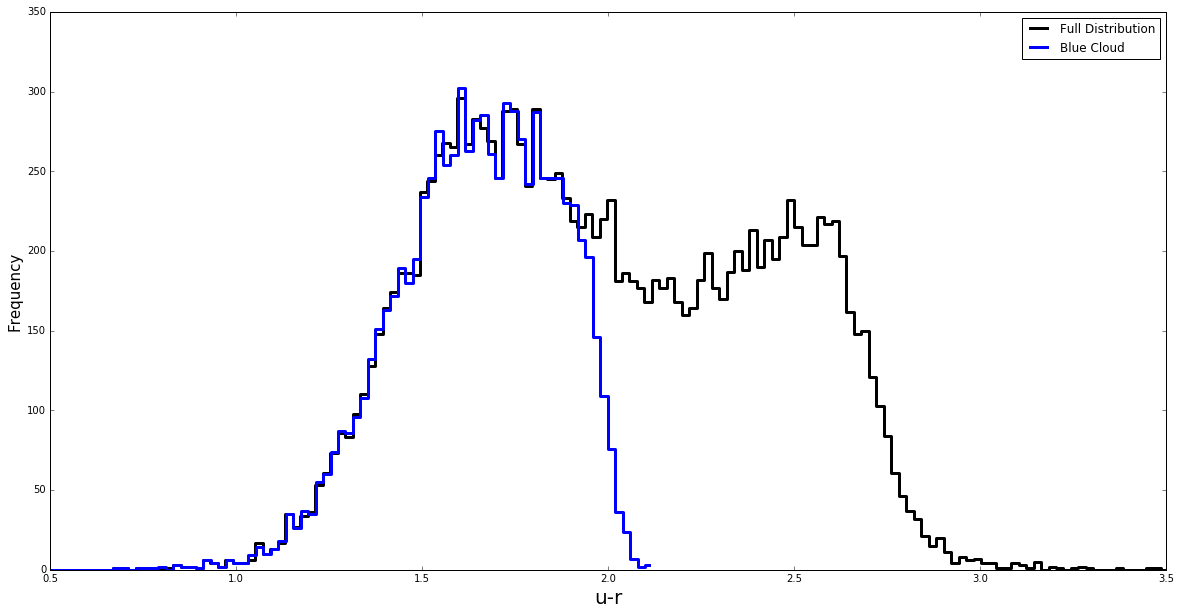

In [80]:
colrow = [3,5]


plt.figure(figsize=(20,10))
plot_hist([row[colrow[0]]-row[colrow[1]] for row in test_data],200,'Full Distribution',set_bin_size=True,bin_size=0.02,normed=False,colour='k')
#plot_hist([row[3]-row[5] for row in reduced_data],200,'Full Distribution',set_bin_size=True,bin_size=0.02,normed=False,colour='k')
plot_hist([row[colrow[0]]-row[colrow[1]] for row in reducedblue],200,'Blue Cloud',set_bin_size=True,bin_size=0.02,normed=False,colour='b')


plt.xlim(0.5,3.5)
plt.xlabel('u-r',fontsize=20)
plt.ylabel('Frequency',fontsize=15)
plt.legend()

In [81]:
np.save('/home/calum/Documents/Mphys_data/vespa_data/naive_blue.npy',reducedblue)
np.save('/home/calum/Documents/Mphys_data/vespa_data/tnaive_blue.npy',test_data)